# Diagrama de Fase Pêndulo Simples



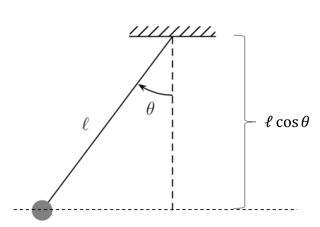

# Energia Cinética

$T = \dfrac{1}{2} m (l \dot \theta)^2$

# Energia Potencial

$U = mgl(1- cos \theta)$

# Equação de Euler-Lagrange

$L = T - U$

$\dfrac{d}{dt} \left( \dfrac{\partial L}{\partial \dot \theta} \right) - \dfrac{\partial L}{\partial \theta}$


$m l^2 \ddot \theta + m g l sin(\theta) = 0$

$\ddot \theta + \dfrac{g}{l} sin(\theta) = 0$

## Equação geral

$\ddot \theta + b \dot \theta + a \sin \theta = 0$

$x_1 = \theta$

$x_2 = \dot \theta$

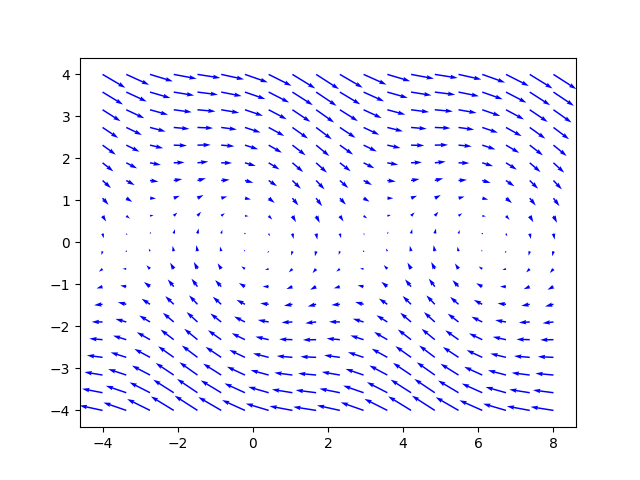

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pylab as pl


# O comando abaixo deve ser usado apenas no Jupyter para ativar o modo interativo
%matplotlib widget


g = 9.81
l = 10


# Sistema não linear

a = g/l
b = .4

def dx_dt(t, x):
  return [x[1], -a * np.sin(x[0]) -b*x[1]]


t0 = 0
tf = 50


# plt.figure(figsize=(8,5), dpi= 100, facecolor='w', edgecolor='k')

# Trajetórias t > 0
ts = np.linspace(t0, tf, 500)

icx = np.arange(-3*np.pi, 3*np.pi+0.1, np.pi/3)
icy = np.array([-3, -1, 0, 1, 3])

saida = []

for r in icx:
  for s in icy:
    x0 = [r, s]
    xs = solve_ivp(dx_dt, (t0, tf), x0, t_eval=ts)
    saida.append(xs.y)
    # plt.plot(xs.y[0,:], xs.y[1,:], "r-")

# Trajetórias t < 0
ts = np.linspace(0, -tf, 500)

for r in icx:
  for s in icy:
    x0 = [r, s]
    xs = solve_ivp(dx_dt, (t0, -tf), x0, t_eval=ts)
    saida.append(xs.y)
    # plt.plot(xs.y[0,:], xs.y[1,:], "r-")



# Campo de vetores
X, Y = np.mgrid[-4:8:20j, -4:4:20j]
u=Y
v=-a * np.sin(X) - b*Y
plt.quiver(X, Y, u, v, color = 'b')
plt.show()

In [2]:
theta0 = -3
thetap0 = 4

t = np.linspace(t0, tf, 500)

f_res = solve_ivp(dx_dt, (t0, tf), [theta0, thetap0], t_eval=t)

x1 = f_res.y[0,:]
x2 = f_res.y[1,:]

(-4.0, 4.0)

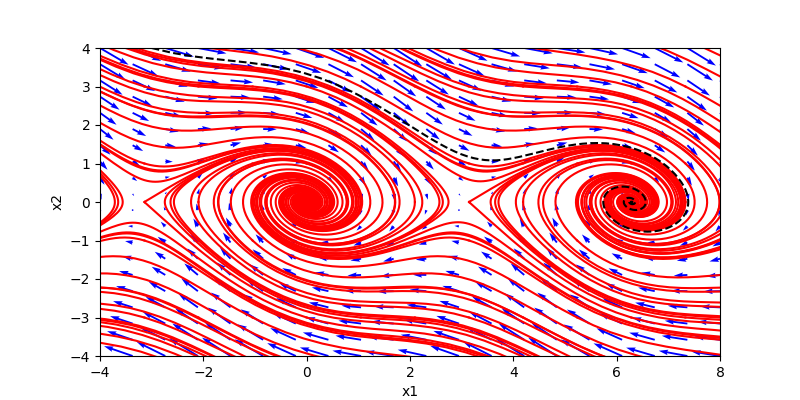

In [3]:
fig0, ax0 = plt.subplots(figsize=(8, 4))

for a in saida:
  ax0.plot(a[0,:], a[1,:], 'r-')

ax0.plot(x1, x2, 'k--')
ax0.quiver(X, Y, u, v, color = 'b')
# m2, = ax2.plot([], [], 'bo', markersize=12)
ax0.set_xlabel("x1")
ax0.set_ylabel("x2")
ax0.set_xlim(-4, 8)
ax0.set_ylim(-4, 4)

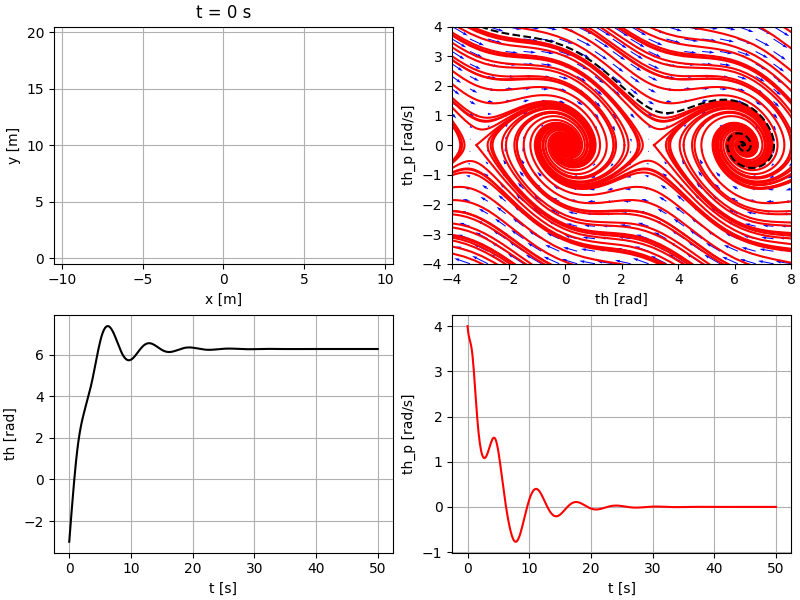

In [4]:
import matplotlib.animation as animation
from matplotlib import rc

  
fig = plt.figure(figsize=(8, 6), constrained_layout=True)


# Gráfico 1: Visualização do pêndulo
ax1 = plt.subplot(221)
    
line, = ax1.plot([], [], 'ko-', lw=2)
m1, = ax1.plot([], [], 'bo', markersize=12)

ax1.grid()
# ax1.axis('equal')
ax1.set_xlim(-l*1.05, l*1.05)
ax1.set_ylim(-.05*l, 2.05*l)

texto = ax1.set_title("t = 0 s")
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")


# Gráfico 2: Visualização do Diagrama de Fase
ax2 = plt.subplot(222)

for a in saida:
  ax2.plot(a[0,:], a[1,:], 'r-')

ax2.plot(x1, x2, 'k--')
ax2.quiver(X, Y, u, v, color = 'b')
m2, = ax2.plot([], [], 'bo', markersize=12)
ax2.set_xlabel("th [rad]")
ax2.set_ylabel("th_p [rad/s]")
ax2.set_xlim(-4, 8)
ax2.set_ylim(-4, 4)


# Gráfico 3: Posição versus tempo
ax3  = plt.subplot(223)

ax3.plot(t, x1, 'k-')
m3, = ax3.plot([], [], 'bo', markersize=12)
ax3.grid()
ax3.set_xlabel("t [s]")
ax3.set_ylabel("th [rad]")


# Gráfico 4: Velocidade versus tempo
ax4  = plt.subplot(224)

ax4.plot(t, x2, 'r-')
m4, = ax4.plot([], [], 'bo', markersize=12)
ax4.grid()
ax4.set_xlabel("t [s]")
ax4.set_ylabel("th_p [rad/s]")

        
def animacao(i):
    pos_x_m1 = l*np.sin(x1[i])
    pos_y_m1 = l*(1-np.cos(x1[i]))
    pos_x = [0, pos_x_m1]
    pos_y = [l, pos_y_m1]
    
    line.set_data(pos_x, pos_y)
    m1.set_data(pos_x_m1, pos_y_m1)
    m2.set_data(x1[i], x2[i])
    m3.set_data(t[i], x1[i])
    m4.set_data(t[i], x2[i])
    texto.set_text("t = {:.2f} s".format(t[i]))
    
    return line, m1, m2, m3, m4, texto

duracao = tf

intervalo = (t[1]-t[0])*1000

n_frames = duracao / (intervalo / 1000)

n_frames

ani = animation.FuncAnimation(fig, animacao, frames = int(n_frames), interval = intervalo, blit=True)


# O comando abaixo deve ser utilizado apenas no Google colab pra gerar o arquivo .mp4
# O processamento deste comando pode demorar alguns minutos pra conclusão e geração do video
# rc('animation', html='html5')

ani